In [3]:

# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('train.csv')

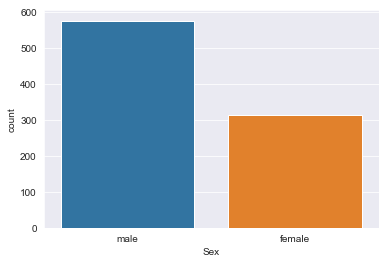

In [8]:
sns.countplot('Sex',data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

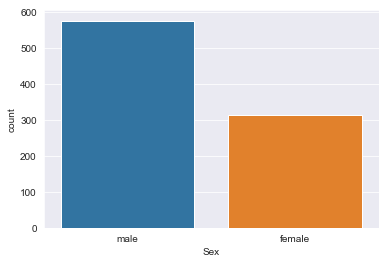

In [12]:
# what is the 
# break from the original - using factorplot breaks sns. The new way is to use countplot.
sns.countplot(x='Sex',data=df)

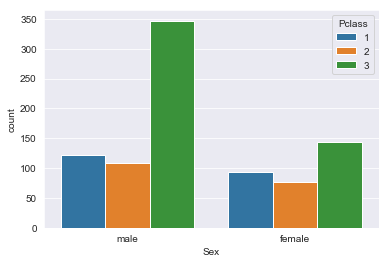

In [13]:
# What Passenger class were they?
sns.countplot(x='Sex',data=df,hue='Pclass')

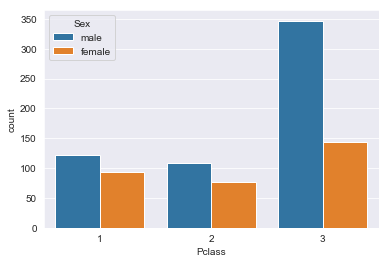

In [14]:
# flip this around: find pclass, then hue on sex
sns.countplot(x='Pclass',data=df,hue='Sex')

In [15]:
# how many were children?
# use .apply() to use a function to update a new column
def mfc(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
    

In [16]:
# create a new columns called 'person'
# use axis=1 on .apply to indicate columns, not indexes
df['person'] = df[['Age','Sex']].apply(mfc,axis=1)

In [17]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


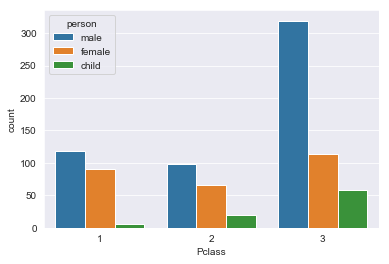

In [18]:
# now we can have the countplot show children as well as men and women
sns.countplot('Pclass',data=df,hue='person')

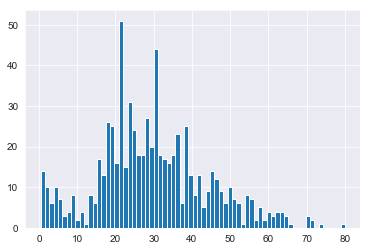

In [19]:
# plot a histogram of ages
df['Age'].hist(bins=70)

In [20]:
# find the mean age
df['Age'].mean()

29.69911764705882

In [21]:
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

#### Creating a facetGrid of the ages:


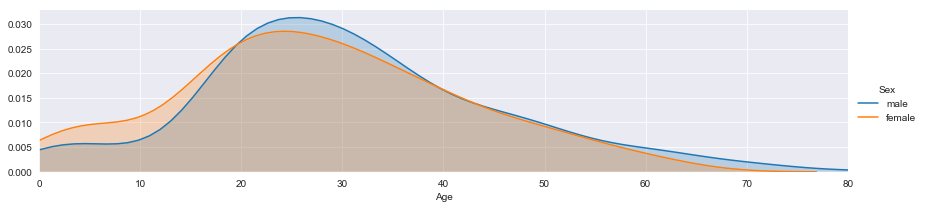

In [24]:
# set the hue, and change the aspect ratio.
fig = sns.FacetGrid(df, hue="Sex",aspect=4)

# use .map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit for the oldest passenger
oldest = df['Age'].max()

# Setting x lower limit at 0 (no negative ages)
fig.set(xlim=(0,oldest))

fig.add_legend()

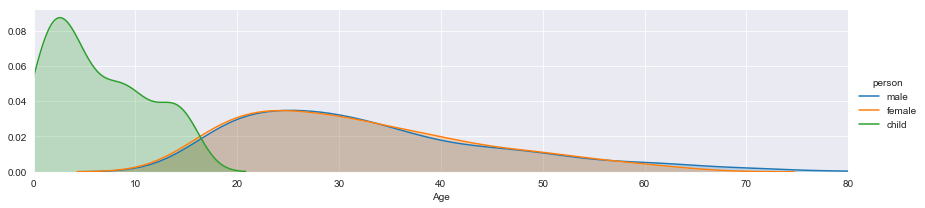

In [25]:
# now use the person column for the hue
fig = sns.FacetGrid(df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

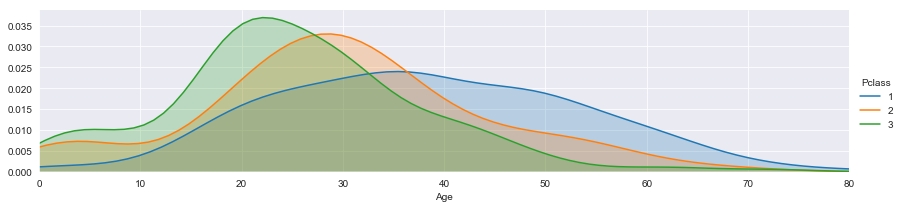

In [27]:
# Do the same for class
fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [28]:
# What deck were the passengers on?
# creating a new object called 'deck' and drop all the NaNs
deck = df['Cabin'].dropna()

In [29]:
# show output
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [30]:
# pull the first letter of the deck to classify its level
levels=[]
for level in deck:
    levels.append(level[0])
    

In [33]:
# show the output
levels[:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [37]:
# Make a dataframe of the cabins
cabindf = pd.DataFrame(levels)
# name the column
cabindf.columns= ['Cabin']

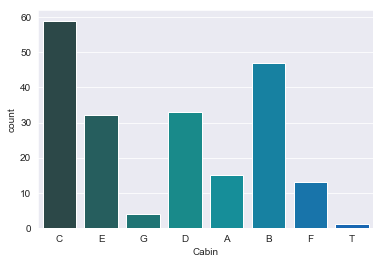

In [40]:
sns.countplot('Cabin',data=cabindf, palette='winter_d')


In [41]:
# 'T' doesn't make sense, so we'll pull it out
cabindf = cabindf[cabindf != 'T']

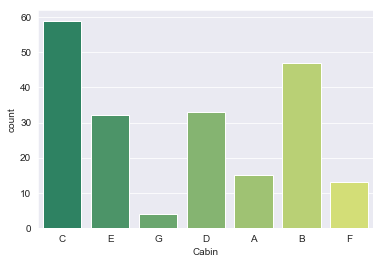

In [43]:
# replot
sns.countplot('Cabin',data=cabindf, palette='summer')

In [45]:
# show where the passengers came from (originating ports)
# S = Southampton
# C = Cherbourg
# Q = Queenstown
df['Embarked'].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

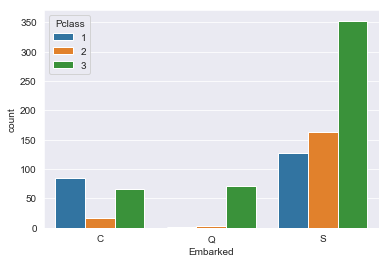

In [50]:
#  plot with a countplot, breaking down by Class. Order by Cherboug, Queenstown, then Southampton
sns.countplot('Embarked', data=df,hue='Pclass',order=['C','Q','S'])

#### Who was Alone and who was With Family?

 Parch (ParentChild) == 0 indicates no traveling companions
 SibSp == no siblings

In [51]:
# make a new column to define alone
df['Alone'] = df['SibSp'] + df['Parch']

In [53]:
df['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [54]:
# non-zero indicates family aboard
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [58]:
df['Alone'].loc[df['Alone'] > 0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Alone'

In [61]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone


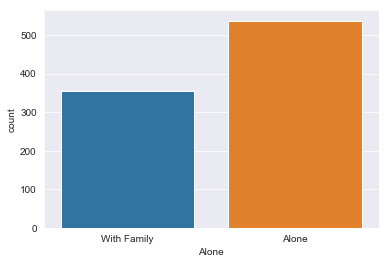

In [62]:
sns.countplot('Alone',data=df)

#### What factors helped someone survive the sinking?


In [64]:
# map the boolean to a no or yes using .map and a dictionary
df['Survivor'] = df.Survived.map({0:'no',1:'yes'})

In [65]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes


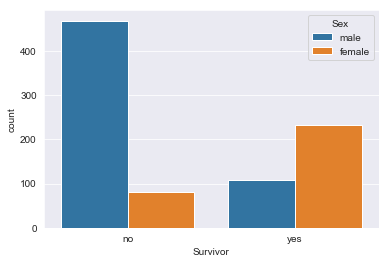

In [76]:
sns.countplot('Survivor',data=df,hue='Sex')

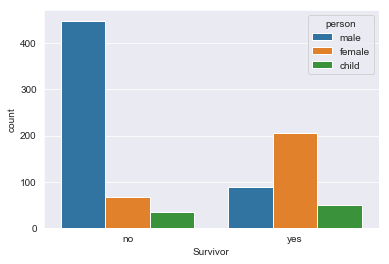

In [78]:
sns.countplot('Survivor',data=df,hue='person')

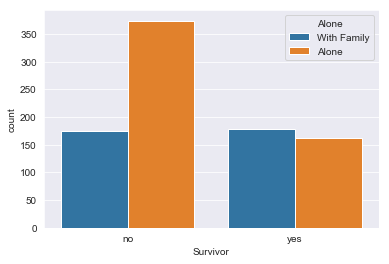

In [69]:
sns.countplot('Survivor',data=df,hue='Alone')

#### what factors correlate to survivability?


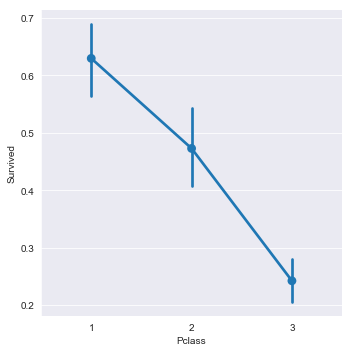

In [72]:
# show a relationship between class and survival using factorplot
sns.factorplot('Pclass','Survived',data=df)
# This suggests people in first class had a better chance than people in 3rd class
# is there a 'Woman And Children First' bias?

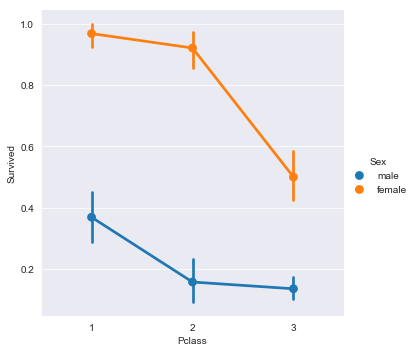

In [79]:
sns.factorplot('Pclass','Survived',data=df,hue='Sex')

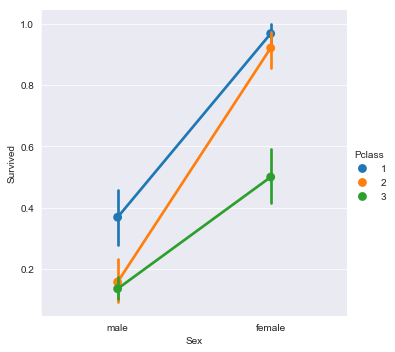

In [83]:
# only up to 2 - adding 3rd assumed "hue"
sns.factorplot('Sex','Survived','Pclass',data=df)

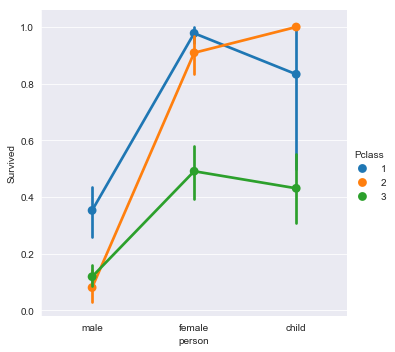

In [80]:
sns.factorplot('person','Survived',data=df,hue='Pclass')

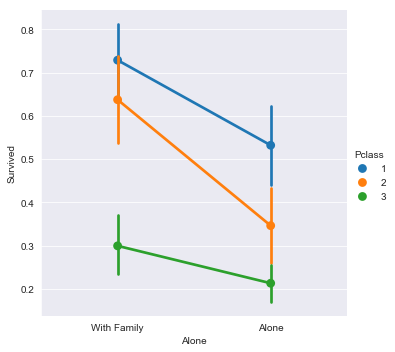

In [85]:
sns.factorplot('Alone','Survived',data=df, hue='Pclass')

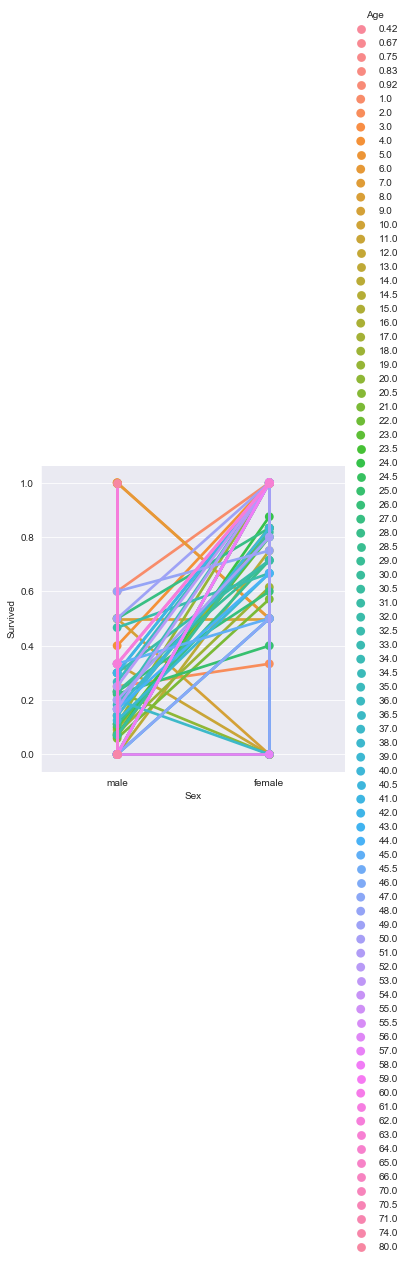

In [87]:
# too much noise with factorplot. 
sns.factorplot('Sex','Survived',data=df, hue='Age')

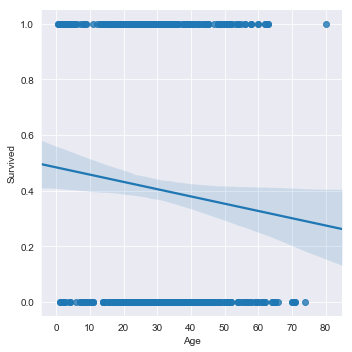

In [88]:
# using lmplot makes this easier to see
sns.lmplot('Age','Survived',data=df)

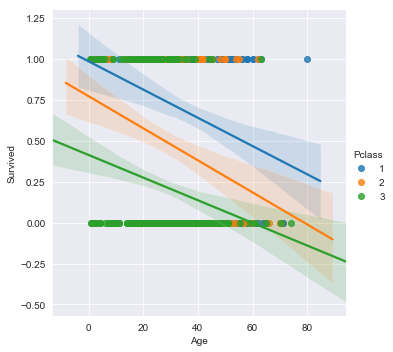

In [97]:
# Does Class have an impact?
sns.lmplot('Age','Survived',data=df,hue='Pclass')
# definitely - more 3rd class deaths across the board

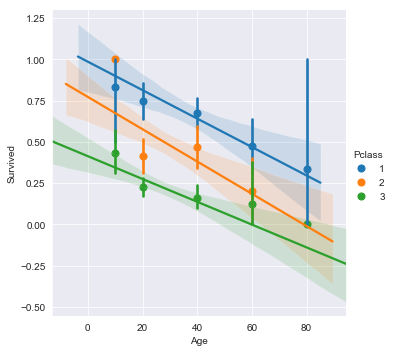

In [98]:
# can we clean this up a little by grouping/binning by Generation?
# this will also add a stDev for the bins
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',data=df,hue='Pclass',x_bins=generations)

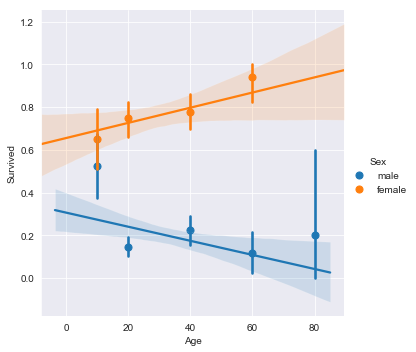

In [102]:
# how about Gender and Age?
# chances were less for older women vs older men, but there's a large stDev
sns.lmplot('Age','Survived',data=df,hue='Sex',x_bins=generations)

#### Does deck have an effect on survival?

In [103]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes


In [105]:
# add a 'deck' column
levels  = df['Cabin'].dropna()

In [107]:
levels.head(3)

1     C85
3    C123
6     E46
Name: Cabin, dtype: object

In [ ]:
for 